## ChatGPT generates model

```
prompt:

Give me a simple example of using sklearn random forest regressor.
Generate data with two features x1 and x2.
The target "y" should look like two gaussian hills above the (x1,x2) plane.
Provide the python code to generate the training data, 
train the model, and provide matplotlib code to visualize 
in 3d the data and the prediction.

Good! 
Please add code do calculate the quality of the prediction.
And please add visualization of the difference between the data and prediction.
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Generate synthetic data
np.random.seed(42)
num_samples = 10_000
x1 = np.random.uniform(-5, 5, num_samples)
x2 = np.random.uniform(-5, 5, num_samples)
X = np.column_stack((x1, x2))

In [3]:
# Create target y as the sum of two Gaussian hills
y = np.exp(-0.5 * ((x1 - 1) ** 2 + (x2 - 1) ** 2)) + np.exp(-0.5 * ((x1 + 1) ** 2 + (x2 + 1) ** 2))

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train the RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [6]:
# Predict the target values for the test set
y_pred = rf.predict(X_test)

In [7]:
# Calculate the quality of the prediction
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R2 Score: {r2:.4f}')

Mean Squared Error: 0.0001
R2 Score: 0.9992


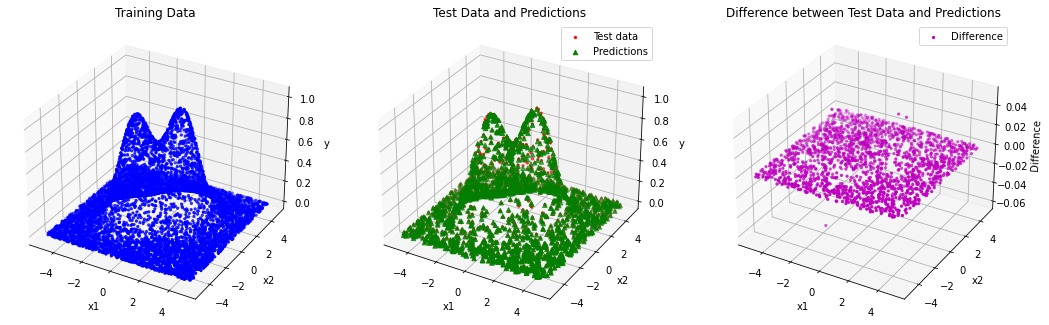

In [8]:
# Visualize the data and the prediction in 3D
fig = plt.figure(figsize=(18, 6))

# Plot the training data
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(X_train[:, 0], X_train[:, 1], y_train, c='b', marker='.', label='Training data')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.set_zlabel('y')
ax1.set_title('Training Data')

# Plot the test data and predictions
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(X_test[:, 0], X_test[:, 1], y_test, c='r', marker='.', label='Test data')
ax2.scatter(X_test[:, 0], X_test[:, 1], y_pred, c='g', marker='^', label='Predictions')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_zlabel('y')
ax2.set_title('Test Data and Predictions')
ax2.legend()

# Plot the differences between test data and predictions
ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(X_test[:, 0], X_test[:, 1], y_test - y_pred, c='m', marker='.', label='Difference')
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_zlabel('Difference')
ax3.set_title('Difference between Test Data and Predictions')
ax3.legend()

plt.show()